In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score


In [2]:
c_data = pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 14 Decision Tree\Company_Data.csv")

In [4]:
c_data.head(9)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No


In [5]:
c_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
c_data.shape

(400, 11)

In [7]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
## conver to variables
c_data_pro=pd.get_dummies(c_data)
c_data_pro

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,False,True,False,False,True,False,True
396,6.14,139,23,3,37,120,55,11,False,False,True,True,False,False,True
397,7.41,162,26,12,368,159,40,18,False,False,True,False,True,False,True
398,5.94,100,79,7,284,95,50,12,True,False,False,False,True,False,True


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.his

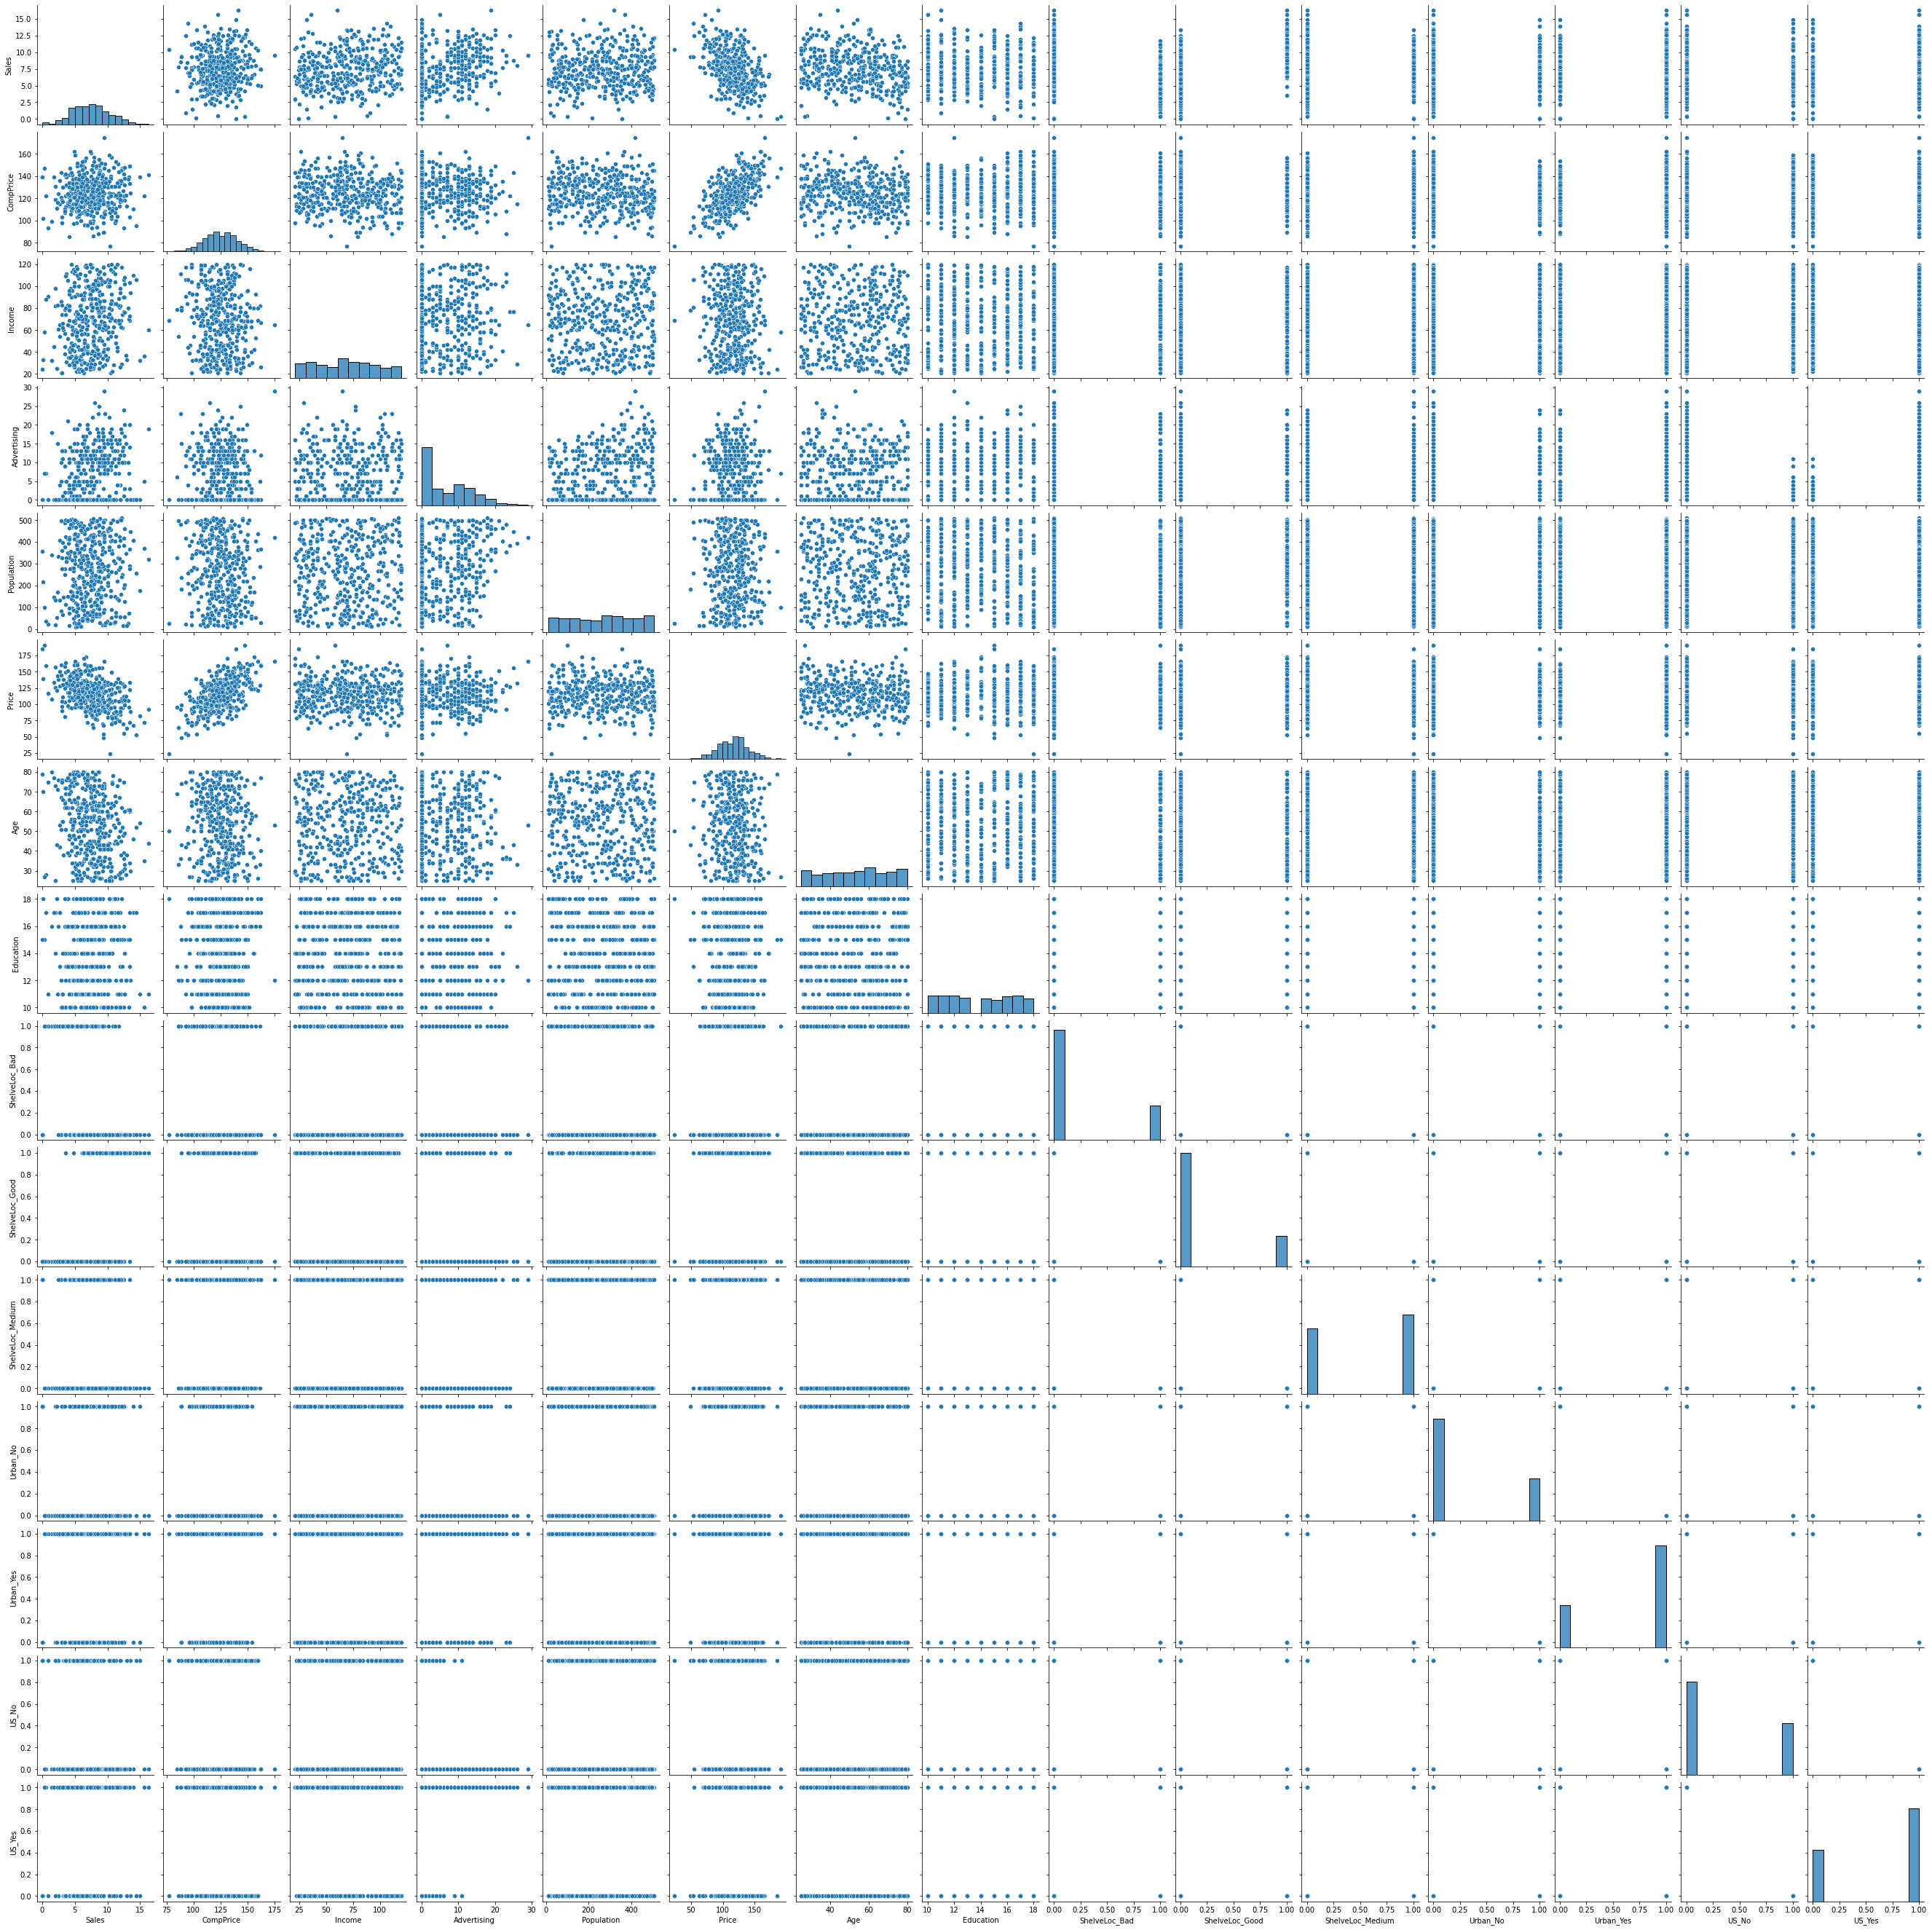

In [12]:
sns.pairplot(c_data_pro)

<Axes: ylabel='Sales'>

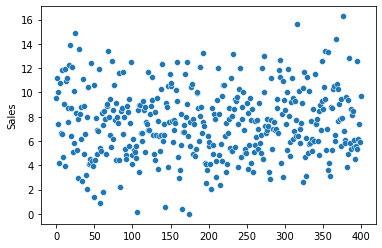

In [13]:
sns.scatterplot(c_data_pro.Sales)

<Axes: ylabel='Income'>

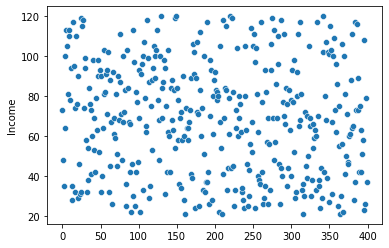

In [14]:
sns.scatterplot(c_data_pro.Income)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee1d328310>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee1b798460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee1d338100>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee1d39dee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee1d3b31c0>],
 'means': []}

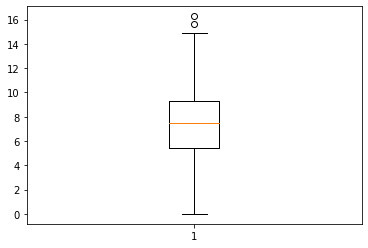

In [16]:
plt.boxplot(c_data_pro.Sales)

In [17]:
c_data_pro.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


In [18]:
#splitting the data into x and y 
x=c_data_pro.drop('Sales',axis=1)
y=c_data_pro['Sales']

In [19]:
array = x.values

In [20]:
df = pd.DataFrame(y)

In [21]:
df.head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


In [22]:
df.max()

Sales    16.27
dtype: float64

In [23]:
df['lable']=pd.cut(x=df['Sales'],bins=[-1,5,10,15,20],labels=['normal_sales','good_sales','better_sales','extem_sales'])

In [24]:
df

,Sales,lable
0,9.50,good_sales
1,11.22,better_sales
2,10.06,better_sales
3,7.40,good_sales
4,4.15,normal_sales
...,...,...
395,12.57,better_sales
396,6.14,good_sales
397,7.41,good_sales
398,5.94,good_sales


In [25]:
y=df['lable']

In [26]:
y

0        good_sales
1      better_sales
2      better_sales
3        good_sales
4      normal_sales
           ...     
395    better_sales
396      good_sales
397      good_sales
398      good_sales
399      good_sales
Name: lable, Length: 400, dtype: category
Categories (4, object): ['normal_sales' < 'good_sales' < 'better_sales' < 'extem_sales']

In [27]:
## building the model 
model=DecisionTreeClassifier()

In [28]:
model.fit(x,y)

DecisionTreeClassifier()

In [29]:
model.score(x,y)

1.0

In [30]:
from sklearn.tree import plot_tree

In [31]:
model.feature_importances_

array([0.14188752, 0.07852855, 0.10378323, 0.10627058, 0.21932914,
       0.16292104, 0.04744537, 0.        , 0.08200412, 0.03502061,
       0.00604234, 0.00453176, 0.01223574, 0.        ])

In [32]:
model.feature_names_in_

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'], dtype=object)

In [33]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
#### load sec data
data =  pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 14 Decision Tree\Fraud_check.csv")

In [37]:
data.head(9)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES


In [38]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [41]:
data.shape

(600, 6)

In [42]:
y=data[['Taxable.Income']]

In [43]:
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


<Axes: ylabel='Taxable.Income'>

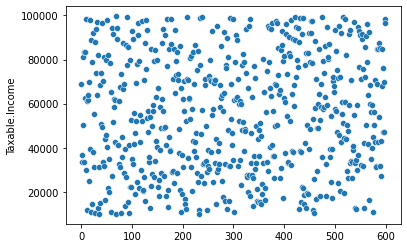

In [44]:
sns.scatterplot(y['Taxable.Income'])

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

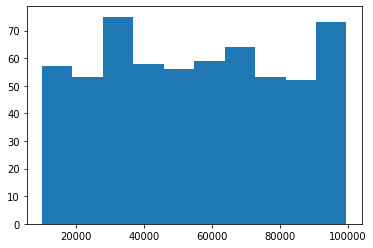

In [45]:
plt.hist(y['Taxable.Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee1d5513a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee1d5518e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee1d551100>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee1d551e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee1d55d100>],
 'means': []}

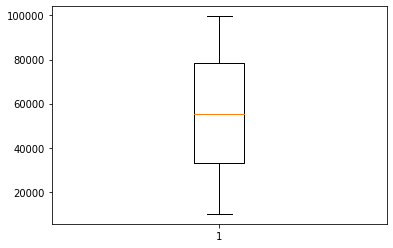

In [46]:
plt.boxplot(y['Taxable.Income'])

In [47]:
y['lable']=pd.cut(x=y['Taxable.Income'],bins=[0,30001,2000000],labels=['risky','good'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14212\810543073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['lable']=pd.cut(x=y['Taxable.Income'],bins=[0,30001,2000000],labels=['risky','good'])


In [48]:
y

,Taxable.Income,lable
0,68833,good
1,33700,good
2,36925,good
3,50190,good
4,81002,good
...,...,...
595,76340,good
596,69967,good
597,47334,good
598,98592,good


In [49]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Taxable.Income  600 non-null    int64   
 1   lable           600 non-null    category
dtypes: category(1), int64(1)
memory usage: 5.5 KB


In [50]:
y['lable'].value_counts()

lable
good     476
risky    124
Name: count, dtype: int64

In [51]:
y_act=y['lable']

In [54]:
x=data.drop('Taxable.Income',axis=1)
x_data=pd.get_dummies(x)

In [55]:
x_data

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,True,False,False,False,True,False,True
1,134075,18,False,True,True,False,False,False,True
2,160205,30,True,False,False,True,False,False,True
3,193264,15,False,True,False,False,True,False,True
4,27533,28,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
595,39492,7,False,True,True,False,False,False,True
596,55369,2,False,True,True,False,False,False,True
597,154058,0,True,False,True,False,False,False,True
598,180083,17,False,True,False,True,False,True,False


C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.his

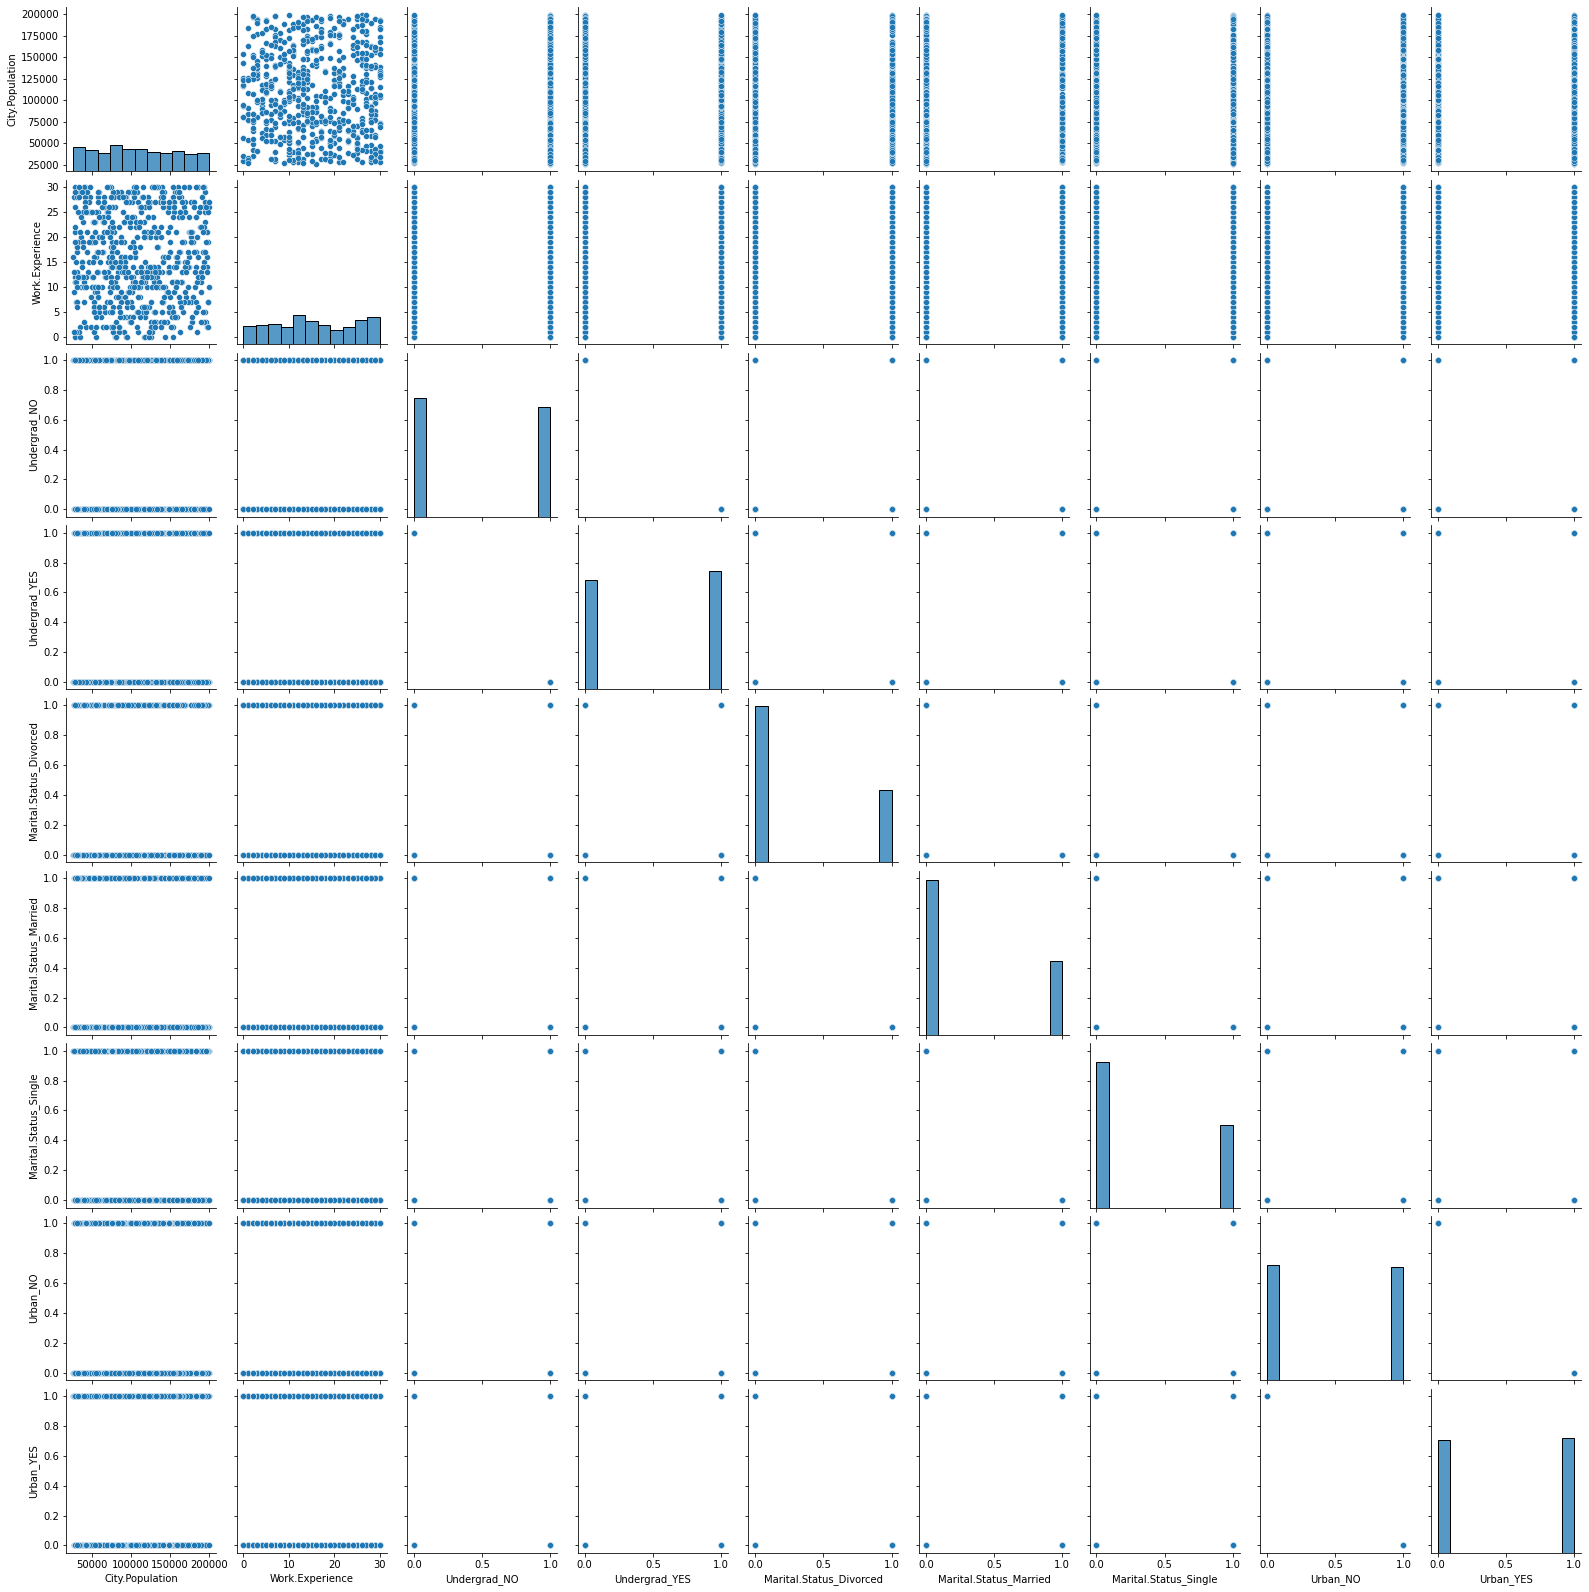

In [56]:
sns.pairplot(x_data)

In [57]:
## split data into test and train

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_act,test_size=0.25,random_state=40)

In [60]:
##building the model
model1=DecisionTreeClassifier()

In [61]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
model1.score(x_train,y_train)

1.0

In [63]:
model1.score(x_test,y_test)

0.6666666666666666

In [64]:
## let us imporove the hyper parameter
model2=DecisionTreeClassifier(max_depth=6)

In [65]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [66]:
model2.score(x_train,y_train)

0.8288888888888889

In [67]:
model2.score(x_test,y_test)

0.7666666666666667